In [1]:
# Libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error

In [2]:

data = pd.read_csv("./House_assignment.csv")
data.head()

,Unnamed: 0,Area,Rooms,Yard,Floors,Owners,Year,Basement,Attic,Garage,Storage,Guest,Price
0,0,75523,3,0,63,8,2005,4313,9005,956,0,7,7559081.5
1,1,80771,39,1,98,6,2015,3653,2436,128,1,2,8085989.5
2,2,55712,58,0,19,8,2021,2937,8852,135,1,9,5574642.1
3,3,32316,47,0,6,4,2012,659,7141,359,0,3,3232561.2
4,4,70429,19,1,90,7,1990,8435,2429,292,1,4,7055052.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   Area        10000 non-null  int64  
 2   Rooms       10000 non-null  int64  
 3   Yard        10000 non-null  int64  
 4   Floors      10000 non-null  int64  
 5   Owners      10000 non-null  int64  
 6   Year        10000 non-null  int64  
 7   Basement    10000 non-null  int64  
 8   Attic       10000 non-null  int64  
 9   Garage      10000 non-null  int64  
 10  Storage     10000 non-null  int64  
 11  Guest       10000 non-null  int64  
 12  Price       10000 non-null  float64
dtypes: float64(1), int64(12)
memory usage: 1015.8 KB


In [4]:
data.describe()

,Unnamed: 0,Area,Rooms,Yard,Floors,Owners,Year,Basement,Attic,Garage,Storage,Guest,Price
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,4999.50000,49870.13120,50.358400,0.508700,50.276300,5.521700,2005.48850,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,2886.89568,28774.37535,28.816696,0.499949,28.889171,2.856667,9.30809,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,0.00000,89.00000,1.000000,0.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,2499.75000,25098.50000,25.000000,0.000000,25.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,4999.50000,50105.50000,50.000000,1.000000,50.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,7499.25000,74609.75000,75.000000,1.000000,76.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,9999.00000,99999.00000,100.000000,1.000000,100.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [5]:
data.dtypes

Unnamed: 0      int64
Area            int64
Rooms           int64
Yard            int64
Floors          int64
Owners          int64
Year            int64
Basement        int64
Attic           int64
Garage          int64
Storage         int64
Guest           int64
Price         float64
dtype: object

<AxesSubplot:>

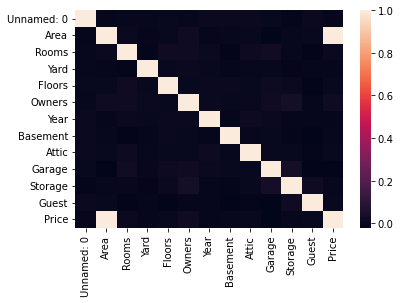

In [6]:
sns.heatmap(data.corr())

In [7]:

for value in data:
    print('For {},{} unique values present'.format(value,data[value].nunique()))

For Unnamed: 0,10000 unique values present
For Area,9483 unique values present
For Rooms,100 unique values present
For Yard,2 unique values present
For Floors,100 unique values present
For Owners,10 unique values present
For Year,32 unique values present
For Basement,6352 unique values present
For Attic,6267 unique values present
For Garage,901 unique values present
For Storage,2 unique values present
For Guest,11 unique values present
For Price,10000 unique values present


In [8]:
data = data.drop(['Unnamed: 0'],axis=1)
data.head()

,Area,Rooms,Yard,Floors,Owners,Year,Basement,Attic,Garage,Storage,Guest,Price
0,75523,3,0,63,8,2005,4313,9005,956,0,7,7559081.5
1,80771,39,1,98,6,2015,3653,2436,128,1,2,8085989.5
2,55712,58,0,19,8,2021,2937,8852,135,1,9,5574642.1
3,32316,47,0,6,4,2012,659,7141,359,0,3,3232561.2
4,70429,19,1,90,7,1990,8435,2429,292,1,4,7055052.0


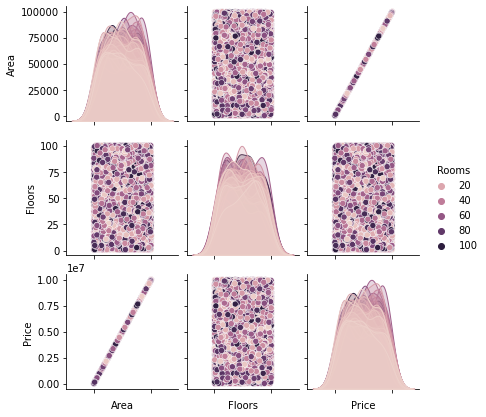

In [9]:
g = sns.pairplot(data[["Area","Rooms","Floors", "Price"]]
                    ,hue='Rooms',height=2)
g.set(xticklabels=[])



<AxesSubplot:xlabel='Guest', ylabel='Price'>

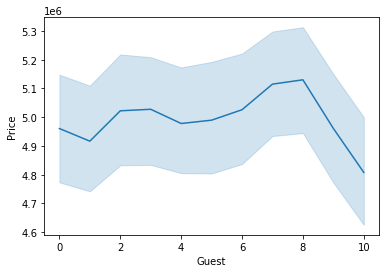

In [10]:
sns.lineplot(data=data, y="Price", x="Guest")

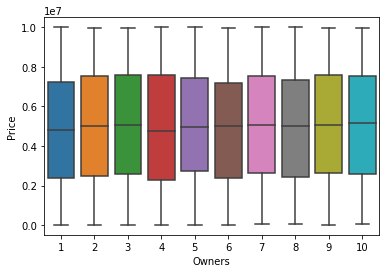

In [11]:
sns.boxplot(y='Price', x='Owners', data=data)
plt.show()

In [12]:
# X(Independent variables) and y(target variables) 
X = data.iloc[:,1:].values
y = data.iloc[:,0].values


In [13]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [14]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train,y_train)
model.score(X_test,y_test)

pred_tr = model.predict(X_test)

In [15]:
print("Decision tree Regression Model Score is ",round(model.score(X_test,y_test)*100))

Decision tree Regression Model Score is  100


In [16]:
model.score(X, y)
predicted_home_prices = model.predict(X)

In [17]:
mean_absolute_error(y, predicted_home_prices)

10.8309